<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/LogisticRegression-%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.07. 기초모델 구현 - Logistic Regression
---
* 날짜:
* 이름:

## 학습내용
    - 로지스틱 회귀 프로세스에 대해 이해한다
    - 시그모이드 함수를 구현한다

```
import numpy as np
import matplotlib.pyplot as plt
```

In [253]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/py model')
from data_loader import iris_loader

import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('dark_background')

X_train, X_test, y_train, y_test = iris_loader(1, 0)
y_train

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0])

## 클래스 작성
---

qasd

In [254]:
class LogisticRegressionGD():
    def __init__(self, lr=0.001, random_state=1): self.lr, self.seed = lr, np.random.RandomState(random_state)
    def init_weights(self, X): self.w = self.seed.normal(loc=0.0, scale = 0.01, size=1+X.shape[1])
    def Log_Odds(self, X): return self.Sigmoid(np.dot(X, self.w[:-1]) + self.w[-1]) #model
    def binary(self, X): return np.where(self.Log_Odds(X) >= 0.5, 1, 0) #pre
    @staticmethod
    def Sigmoid(X): return 1. /(1. +np.exp(-X)) #model
    @staticmethod
    def loss(y, y_hat): return -y.dot(np.log(y_hat)) -(1-y).dot(np.log(1-y_hat)) #loss
    @staticmethod
    def accuracy(y, y_logit): return np.count_nonzero( y == y_logit ) / len( y ) #acc 
    def evaluate(self, X, y): return (np.sum(self.loss(y,self.Log_Odds(X))) / len(y)), self.accuracy(y, self.binary(X)) #eval
    def fit(self, X, y, epochs=10, show_params=False, show_More=True):
        self.init_weights(X)
        self.history=dict(loss=[], acc=[])
        for epoch in range(epochs):
            self.w[:-1] += self.lr * np.dot(X.T , (y-self.binary(X)))
            self.w[-1] += self.lr * np.sum(y-self.binary(X))
            loss, acc = self.evaluate(X, y)
            self.history['loss'].append(loss)
            self.history['acc'].append(acc)
            if show_More: print(f'[Epoch {epoch+1}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
            if show_params: print(self.w)

    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        y_hat = self.Log_Odds(X)
        y_pred = self.binary(X)
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
        plt.legend()
        plt.show()
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['acc'], label='acc', marker='o')
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()
    
    @staticmethod
    def HP(X, y, epochs=10, XX=X_test, YY=y_test):
        outprint = []
        for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
            modelA = LogisticRegressionGD(lr=lr)
            history2 = modelA.fit(X, y, epochs=epochs, show_More=False)
            outprint.append(f'===== lr {lr} ==== {modelA.evaluate(XX, YY)}')
        return print(f'{outprint[4]}\n{outprint[3]}\n{outprint[2]}\n{outprint[1]}\n{outprint[0]}')
model = LogisticRegressionGD()

## iris 데이터로 분류 진행
---

### **학습전 성능 평가**

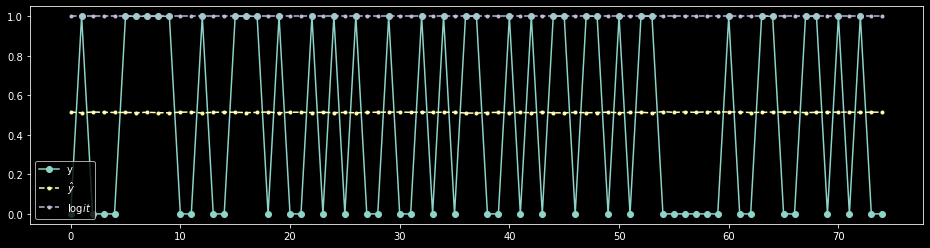

성능:  (0.6971611251403644, 0.4666666666666667)


In [255]:
model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [256]:
history = model.fit(X_train, y_train, epochs=20)

[Epoch 1] loss: 0.96  acc: 0.47
[Epoch 2] loss: 0.63  acc: 1.0
[Epoch 3] loss: 0.63  acc: 1.0
[Epoch 4] loss: 0.63  acc: 1.0
[Epoch 5] loss: 0.63  acc: 1.0
[Epoch 6] loss: 0.63  acc: 1.0
[Epoch 7] loss: 0.63  acc: 1.0
[Epoch 8] loss: 0.63  acc: 1.0
[Epoch 9] loss: 0.63  acc: 1.0
[Epoch 10] loss: 0.63  acc: 1.0
[Epoch 11] loss: 0.63  acc: 1.0
[Epoch 12] loss: 0.63  acc: 1.0
[Epoch 13] loss: 0.63  acc: 1.0
[Epoch 14] loss: 0.63  acc: 1.0
[Epoch 15] loss: 0.63  acc: 1.0
[Epoch 16] loss: 0.63  acc: 1.0
[Epoch 17] loss: 0.63  acc: 1.0
[Epoch 18] loss: 0.63  acc: 1.0
[Epoch 19] loss: 0.63  acc: 1.0
[Epoch 20] loss: 0.63  acc: 1.0


### **학습 후 성능평가**

성능:  (0.6295460826257059, 1.0)


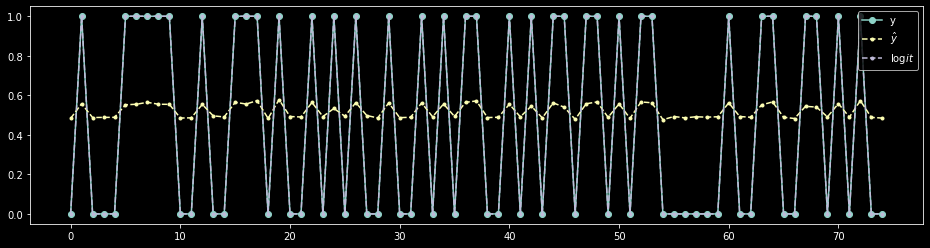

In [257]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

성능:  (0.6188795293376225, 1.0)


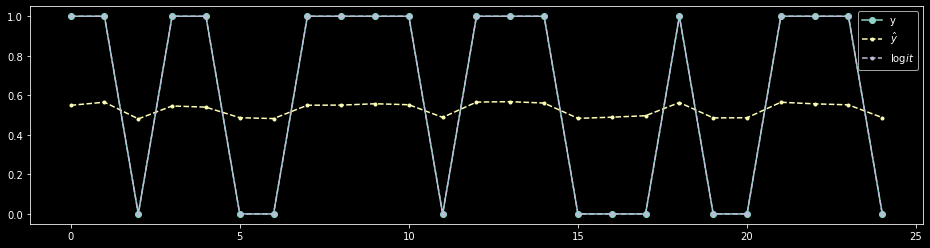

In [258]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

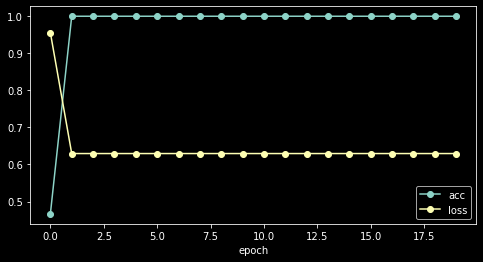

In [259]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [260]:
model.HP(X_train, y_train, 100)

===== lr 0.1 ==== (nan, 1.0)
===== lr 0.01 ==== (0.0040226383395002485, 1.0)
===== lr 0.001 ==== (0.38374904567631885, 1.0)
===== lr 0.0001 ==== (0.6623338762059535, 1.0)
===== lr 1e-05 ==== (0.6877433303672579, 1.0)
